# <span style="color:red"><center>Introducción a FastText</center></span>

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Instalación](#Instalación)
* [Modelo No Supervisado](#Modelo-No-Suervisado)
    * [Uso del Modelo (Toy Example)](#Uso-del-Modelo-\(Toy-Example\))
        * [Jugando con los Parámetros](#Jugando-con-los-Parámetros)
        * [Palabras vecinas más cercanas](#Palabras-vecinas-más-cercanas)
    * [Uso del Modelo (Wikipedia)](#Uso-del-Modelo-(Wikipedia))
        * [Preprocesamiento](#Preprocesamiento)
        * [Entrenando el Modelo](#Entrenando-el-Modelo)
        * [Palabras más cercanas](#Palabras-más-cercanas)
        * [Curiosidades](#Curiosidades)
        * [Analogía de Palabras](#Analogía-de-Palabras)
* [Modelo Supervisado](#Modelo-Supervisado)
    * [Uso del Modelo](#Uso-del-Modelo)
    * [Mejorando el Modelo](#Mejorando-el-Modelo)
    * [Autotuning de Parámtros](#Autotuning-de-Parámetros)

## <span style="color:blue">Introducción</span>

El modelo [FastText](https://fasttext.cc/) fue introducido por primera vez por Facebook en 2016 como una extensión y supuestamente una mejora del modelo vainilla de Word2Vec. 

Está basado en el artículo original titulado [Enriching Word Vectors with Subword Information](https://arxiv.org/pdf/1607.04606.pdf) de Mikolov et al. que es una lectura excelente para obtener una comprensión profunda de cómo funciona este modelo. En general, FastText es un marco para el aprendizaje de representaciones de palabras y también para realizar una clasificación de texto sólida, rápida y precisa. 

El marco es de código abierto de Facebook en GitHub y afirma tener lo siguiente.

1. Vectores de palabras en inglés de última generación.
2. Vectores de palabras para 157 idiomas entrenados en Wikipedia y rastreo.
3. Modelos para identificación de idiomas y diversas tareas supervisadas.

De acuedo con los autores,  en general, los modelos predictivos como el modelo *Word2Vec* suelen considerar cada palabra como una entidad distinta (por ejemplo, dónde) y generan una incrustación densa para la palabra. 

Sin embargo, esto representa una seria limitación con los idiomas que tienen un vocabulario masivo y muchas palabras raras que pueden no aparecer mucho en diferentes corpus. El modelo Word2Vec normalmente ignora la estructura morfológica de cada palabra y considera una palabra como una sola entidad. 

El modelo **FastText** considera cada palabra como una bolsa de n-gramas de caracteres. Esto también se denomina modelo de subpalabras en el documento.


Se agregan símbolos de límites especiales <y> al principio y al final de las palabras. Esto  permite distinguir prefijos y sufijos de otras secuencias de caracteres. También incluiyen la propia palabra *w* en el conjunto de sus n-gramas, para aprender una representación de cada palabra (además de su carácter n-gramas). 
    
    
Tomando la palabra *where* y n = 3 (tri-gramas) como ejemplo, estará representada por el carácter n-gramas: <wh, whe, her, ere, re> y la secuencia especial <where> que representa la palabra completa . 
    
 Tenga en cuenta que la secuencia, correspondiente a la palabra <her> es diferente del trigrama ella de la palabra where.
    
En la práctica, el artículo recomienda extraer todos los n-gramas para $3\le n \le 6$ Este es un enfoque muy simple, y se podrían considerar diferentes conjuntos de n-gramas, por ejemplo, tomando todos los prefijos y sufijos. 
    
Normalmente asociamos una representación vectorial (incrustación) a cada n-grama de una palabra. Por tanto, podemos representar una palabra mediante la suma de las representaciones vectoriales de sus n-gramas o el promedio de la incrustación de estos n-gramas. 
    
Según los autores, debido a este efecto de aprovechar los n-gramas de palabras individuales basadas en sus caracteres, existe una mayor probabilidad de que las palabras raras obtengan una buena representación, ya que sus n-gramas basados en caracteres deben aparecer en otras palabras del corpus.
    
Vamos a la práctica.

[[Volver al inicio]](#Contenido)

## <span style="color:blue">Instalación</span>

`$ git clone https://github.com/facebookresearch/fastText.git`

`$ cd fastText`

`$ sudo pip install .`

`$ # or :`

`$ sudo python setup.py install`

o instalar usando estos pasos: https://medium.com/@oleg.tarasov/building-fasttext-python-wrapper-from-source-under-windows-68e693a68cbb

Si todo va bien, el siguiente comando debería funcionar:

In [ ]:
!pip3 install fasttext-wheel

: 

In [ ]:
import fasttext as ft

: 

In [3]:
help(ft.FastText)

Help on module fasttext.FastText in fasttext:

NAME
    fasttext.FastText

DESCRIPTION
    # Copyright (c) 2017-present, Facebook, Inc.
    # All rights reserved.
    #
    # This source code is licensed under the MIT license found in the
    # LICENSE file in the root directory of this source tree.

FUNCTIONS
    cbow(*kargs, **kwargs)
    
    load_model(path)
        Load a model given a filepath and return a model object.
    
    read_args(arg_list, arg_dict, arg_names, default_values)
    
    skipgram(*kargs, **kwargs)
    
    supervised(*kargs, **kwargs)
    
    tokenize(text)
        Given a string of text, tokenize it and return a list of tokens
    
    train_supervised(*kargs, **kwargs)
        Train a supervised model and return a model object.
        
        input must be a filepath. The input text does not need to be tokenized
        as per the tokenize function, but it must be preprocessed and encoded
        as UTF-8. You might want to consult standard preprocessi

In [4]:
dir(ft)

['BOW',
 'EOS',
 'EOW',
 'FastText',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'cbow',
 'division',
 'load_model',
 'print_function',
 'skipgram',
 'supervised',
 'tokenize',
 'train_supervised',
 'train_unsupervised',
 'unicode_literals']

Como podemos observar, contamos con dos modelos: **unsupervised** y **supervised**.

Veamos cómo funcionan.

In [8]:
#ft.FastText.eprint = lambda x: None
model_es= ft.load_model("cc.es.300.bin")

In [9]:
model_es.get_nearest_neighbors('sueño')

[(0.7171677947044373, 'sueños'),
 (0.7092401385307312, 'sueno'),
 (0.6959096789360046, 'sueño.El'),
 (0.6859577298164368, 'sueño.Y'),
 (0.6825155019760132, 'Sueño'),
 (0.6815561652183533, 'sueño.La'),
 (0.6758346557617188, 'sueño.Pero'),
 (0.6724787950515747, 'sueño.A'),
 (0.6669973134994507, 'sueño.Es'),
 (0.6650846600532532, 'sueñoUn')]

In [7]:
model_es.get_nearest_neighbors('sentimiento')

[(0.7178170084953308, 'sentimiendo'),
 (0.6997774839401245, 'sentimento'),
 (0.6831148266792297, 'sentiemiento'),
 (0.678977370262146, 'sentimeinto'),
 (0.671016275882721, 'resentimiento'),
 (0.6657986044883728, 'elsentimiento'),
 (0.654339075088501, 'sentimientos'),
 (0.6396598219871521, 'Sentimiento'),
 (0.638056218624115, 'sentimientode'),
 (0.6268573999404907, 'sentimiento.El')]

In [10]:
model_es.get_analogies("madrid", "españa", "francia")

[(0.5945168733596802, 'barcelona'),
 (0.5862203240394592, 'paris'),
 (0.5770415663719177, 'montpellier'),
 (0.5740096569061279, 'getafe'),
 (0.572130024433136, 'bilbao'),
 (0.5658920407295227, 'lyon'),
 (0.5628228187561035, 'toulouse'),
 (0.560162365436554, 'francia.'),
 (0.5566875338554382, 'parís'),
 (0.556550145149231, 'lisboa')]

In [11]:
model_es.get_analogies("cuchara", "comer", "golpear")

[(0.5483848452568054, 'golpeando'),
 (0.5168072581291199, 'espátula'),
 (0.5141013264656067, 'golpea'),
 (0.5017028450965881, 'martillo'),
 (0.49357181787490845, 'golpeándolo'),
 (0.49273625016212463, 'golpee'),
 (0.48724186420440674, 'golpearla'),
 (0.4864853620529175, 'golpearlo'),
 (0.48304662108421326, 'golpeara'),
 (0.48251548409461975, 'varilla')]

In [12]:
model_en= ft.load_model("cc.en.300.bin")

In [5]:
model_en.get_analogies("madrid", "spain", "france")

[(0.7098618745803833, 'paris'),
 (0.6233865022659302, 'france.'),
 (0.6171808838844299, 'strasbourg'),
 (0.6088063716888428, 'paris.'),
 (0.6075001358985901, 'lyon'),
 (0.5934714674949646, 'avignon'),
 (0.593320369720459, 'marseille'),
 (0.5895377397537231, 'barcelona'),
 (0.5858014225959778, 'belgium'),
 (0.5839905142784119, 'geneve')]

In [13]:
model_es.get_nearest_neighbors('israel')

[(0.7454308867454529, 'israel.'),
 (0.7169222235679626, 'Israel'),
 (0.6941083669662476, 'israeli'),
 (0.6480574607849121, 'israelí.'),
 (0.643038272857666, 'Israel.Y'),
 (0.6407830715179443, 'hezbollah'),
 (0.6378243565559387, 'jordania'),
 (0.6302906274795532, 'Israel.A'),
 (0.6296384334564209, 'israelis'),
 (0.6228970885276794, 'israelies')]

[[Volver al inicio]](#Contenido)

## Modelo No Supervisado

Para este ejemplo de juguete, usemos los poemas de Daniel.

## Uso del Modelo (Toy Example)

In [12]:
model = ft.train_unsupervised('../Datos/Poemas_Todo.txt')

Veamos qué tiene el modelo por dentro:

In [13]:
dir(model)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_labels',
 '_words',
 'bucket',
 'dim',
 'epoch',
 'f',
 'get_analogies',
 'get_dimension',
 'get_input_matrix',
 'get_input_vector',
 'get_label_id',
 'get_labels',
 'get_line',
 'get_meter',
 'get_nearest_neighbors',
 'get_output_matrix',
 'get_sentence_vector',
 'get_subword_id',
 'get_subwords',
 'get_word_id',
 'get_word_vector',
 'get_words',
 'is_quantized',
 'label',
 'labels',
 'loss',
 'lr',
 'lrUpdateRate',
 'maxn',
 'minCount',
 'minCountLabel',
 'minn',
 'neg',
 'predict',
 'pretrainedVectors',
 'quantize',
 'save_model',
 'set_args',
 'set_matrices',
 't',
 'test',
 'test_la

In fastText, model.words is an attribute that provides a list of all the words (or tokens) that are present in the trained word embedding model.

In [14]:
print(model.words)

['</s>', 'y', 'de', 'que', 'la', 'el', 'en', 'las', 'con', 'los', 'por', 'un', 'se', 'tu', 'del', 'a', 'una', 'no', 'mi', 'te', 'es', 'me', 'como', 'su', 'mis', 'para', 'sin', 'tus', 'entre', 'porque', 'lo', 'más', 'sus', 'nos', 'noche', 'ese', 'cada', 'pero', 'hasta', 'al', 'todo', 'manos', 'cielo', 'Y', 'ojos', 'cuerpo', 'día', 'sueño', 'ni', 'son', 'ser', 'cuando', 'qué', 'Te', 'o', 'le', 'ya', 'palabras', 'labios', 'Me', 'mujer', 'cosas', 'sobre', 'mundo', 'si', 'cuerpos', 'eres', 'luna', 'esa', 'vida', 'donde', 'piel,', 'toda', 'jamás', 'amor', 'sólo', 'En', 'este', 'sueños', 'siempre', 'hay', 'Es', 'e', 'va', 'Ese', 'lleno', 'rostro', 'tan', 'sueños,', 'nuestra', 'dos', 'pasión', 'he', 'visto', 'quien', 'puedo', 'La', 'mar', 'nubes', 'Yo', 'ha', 'noche,', 'frío', 'deseo', 'gusta', 'imagen', 'He', 'contra', 'cara', 'misma', 'volando', 'formas', 'aire', 'mirando', 'aún', 'entonces', 'veces', 'letras', 'lejos', 'piel', 'hacia', 'dónde', 'éste', 'besos', 'alma', 'brisa', 'dulce', 'oj

In [15]:
len(model.words)

184

In [16]:
model.get_nearest_neighbors('sentimiento')

[(0.7667388916015625, 'mientras'),
 (0.7591590285301208, 'entre'),
 (0.759091317653656, 'somos'),
 (0.7474069595336914, '</s>'),
 (0.7449639439582825, 'colores'),
 (0.743857204914093, 'de'),
 (0.7411065101623535, 'es'),
 (0.7392478585243225, 'las'),
 (0.7382482886314392, 'por'),
 (0.7361416816711426, 'sirve')]

In [17]:
model.get_nearest_neighbors('caricia')

[(0.9564667344093323, 'caricias'),
 (0.9329507350921631, 'no'),
 (0.9244406819343567, 'por'),
 (0.9208260774612427, 'sueños'),
 (0.9155965447425842, 'sueños,'),
 (0.9153348803520203, 'de'),
 (0.9141097664833069, 'noche,'),
 (0.9124150276184082, 'manos'),
 (0.9092956781387329, 'noche'),
 (0.9092336893081665, 'porque')]

In [18]:
caricia_vector = model.get_word_vector("caricia")
caricia_vector

array([ 1.8282509e-03,  2.2472753e-03, -1.8691482e-03, -7.4706262e-04,
        3.5899787e-03,  2.4872303e-03, -2.0400898e-03, -8.1846118e-04,
        3.5643405e-03,  1.9185699e-03, -1.2936767e-03,  9.4974542e-04,
       -2.3027223e-03,  1.4906833e-03, -1.2391269e-03,  1.0241555e-03,
        1.5017717e-03,  5.0399877e-04,  1.2899849e-03, -4.7158096e-03,
        1.3692804e-03,  2.6455361e-03, -6.1784487e-04, -2.4706139e-03,
        5.5282458e-04, -4.8401326e-04, -7.0165377e-05, -3.0699319e-03,
       -3.5430565e-03,  1.8578744e-03, -3.6896374e-03, -7.3585304e-04,
        2.0048295e-03, -2.6315907e-03, -3.2852846e-03, -4.6780589e-03,
       -1.2223543e-04,  5.8260030e-05, -8.9832244e-04, -3.0198488e-03,
        3.0285101e-03,  2.5896092e-03, -6.8259636e-05,  2.4928255e-03,
        1.0723916e-03, -1.0879536e-03,  1.1751676e-03,  7.3944015e-04,
       -1.4697779e-03,  1.8038995e-03, -1.3552998e-03,  9.0843771e-04,
       -6.3468784e-04,  2.0573421e-03, -2.7762126e-04, -3.4620774e-03,
      

In [19]:
caricia_vector.shape

(100,)

In [20]:
model.save_model("Poemas.bin")

In [21]:
model = ft.load_model("Poemas.bin")

Por defecto, el modelo entrenado es skipgram, pero también tenemos disponible la arquitectura cbow.

![ft](https://fasttext.cc/img/cbo_vs_skipgram.png)

Fuente: [FastText, Word Representations](https://fasttext.cc/docs/en/unsupervised-tutorial.html)

In [22]:
model_cbow = ft.train_unsupervised('../Datos/Poemas_Todo.txt', "cbow")

In [23]:
caricia_vector_cbow = model_cbow.get_word_vector("caricia")
caricia_vector_cbow

array([ 5.1579083e-04,  9.6458232e-04, -8.2982023e-04, -6.3916121e-04,
        2.1096338e-03,  1.0510600e-03, -8.1509049e-04, -8.5797183e-05,
        2.4331012e-03,  7.0285663e-04, -7.8027078e-04,  5.7589199e-04,
       -9.6834468e-04,  6.7296531e-04, -5.3776999e-04,  1.5007285e-03,
        1.1316790e-03, -7.9733302e-04,  9.4857358e-04, -2.5366074e-03,
        1.4299041e-03,  1.8834885e-03, -4.5240912e-04, -2.0916890e-03,
       -4.0293232e-04, -4.7144195e-04,  5.0089449e-05, -1.9621153e-03,
       -1.7945322e-03,  1.0589340e-03, -1.8753993e-03, -8.9990924e-04,
        9.0886513e-04, -1.7537239e-03, -1.8921749e-03, -3.0444048e-03,
        3.9784083e-04, -4.2600539e-05,  2.9561762e-04, -1.5733851e-03,
        1.8627665e-03,  1.0404066e-03, -4.5140550e-04,  6.7754387e-04,
        8.4142125e-04,  3.0423456e-04,  8.4430112e-06,  6.5456657e-04,
       -1.0573704e-03,  5.7874655e-04, -8.2040537e-04, -4.3728433e-04,
       -4.9233095e-05,  1.3580963e-03,  1.8065520e-04, -2.1158038e-03,
      

In [24]:
model_cbow.get_nearest_neighbors('sentimiento')

[(0.6235255599021912, 'mientras'),
 (0.5948073863983154, 'entre'),
 (0.5928695797920227, 'somos'),
 (0.5914546251296997, '</s>'),
 (0.5863041877746582, 'las'),
 (0.5856991410255432, 'de'),
 (0.5831426978111267, 'colores'),
 (0.5735453367233276, 'colores,'),
 (0.5706779956817627, 'sirve'),
 (0.5694554448127747, 'esperando')]

En palabras de Facebook,

***In practice, we observe that skipgram models works better with subword information than cbow.***

[[Volver al inicio]](#Contenido)

### Jugando con los Parámetros 

Dependiendo del problema, puede ser que los parámetros por defecto no sean los más adecuados.

Para conocer todos los parámetros de FastText, podemos ingresar [aquí](https://fasttext.cc/docs/en/python-module.html#train_unsupervised-parameters)

Por ejemplo, modifiquemos los parámetros **mínimos** y **máximos** de lo n-gramas permitidos, la **dimensión** del vector, las **epochs** y la frecuencia mínima de palabras:

In [14]:
import fasttext as ft

In [15]:
model_vec = ft.train_unsupervised('../Datos/Poemas_Todo.txt', minCount=2, minn=3, maxn=5, dim=300,pretrainedVectors='cc.es.300.vec')

Verifiquemos la longitud de las palabras:

In [16]:
model_vec.get_word_vector("sentimiento").shape

(300,)

In [17]:
model_vec.get_nearest_neighbors('sentimiento')

[(0.9988006949424744, 'Asentimiento'),
 (0.9985209703445435, 'asentimiento'),
 (0.998471736907959, 'disentimiento'),
 (0.9981051087379456, 'sentimiento.Un'),
 (0.9976478815078735, 'Resentimiento'),
 (0.9972191452980042, 'Sentimiento'),
 (0.9971750974655151, 'sentimiento.'),
 (0.9969228506088257, '--Sentimiento'),
 (0.996867835521698, 'Consentimiento'),
 (0.9967299699783325, 'sentimientode')]

[[Volver al inicio]](#Contenido)

### Palabras vecinas más cercanas

Como cada palabra en el corpus tiene un vector asociado, podemos obtener palabras cercanas usando la similaridad de coseno:

Cosine similarity is a measure of similarity between two non-zero vectors in an inner product space, often used in the context of information retrieval and natural language processing. It quantifies the cosine of the angle between the two vectors, which provides a measure of their orientation or similarity, independent of their magnitude (length).

The cosine similarity between two vectors, A and B, is calculated as follows:

Cosine Similarity (A, B) = (A · B) / (||A|| * ||B||)

Where:

    A · B represents the dot product of vectors A and B.
    ||A|| and ||B|| represent the Euclidean norms (or magnitudes) of vectors A and B, respectively.

<figure>
<center>
<img src="../Imagenes/cosine_similarity.png" width="400" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Cosine Similarity</p>
</figcaption>
</figure>


In [18]:
 model_vec.get_nearest_neighbors('sueño',k=20)

[(0.9957048892974854, 'Ensueño'),
 (0.9952141046524048, 'sueño.El'),
 (0.9951835870742798, 'Risueño'),
 (0.9950355291366577, 'sueñoQue'),
 (0.9949803352355957, 'sueño.La'),
 (0.9948410987854004, 'sueño.Un'),
 (0.9945787191390991, 'sueñoEl'),
 (0.9944154620170593, 'sueño.En'),
 (0.9943743944168091, 'sueñoLa'),
 (0.9942408204078674, 'sueñoSor'),
 (0.9942172169685364, 'sueño.No'),
 (0.9939424991607666, 'sueño.Me'),
 (0.9935823678970337, 'sueñoy'),
 (0.9934048056602478, 'sueñono'),
 (0.9931100010871887, 'sueño.Y'),
 (0.9930814504623413, 'sueño.A'),
 (0.9930751919746399, 'sueño.-'),
 (0.992457926273346, 'sueño.'),
 (0.9921504855155945, 'sueñoo'),
 (0.9921478629112244, 'sueño-')]

In [19]:
 model_vec.get_nearest_neighbors('amor',k=20)

[(0.9981568455696106, 'amorAmor'),
 (0.9974086880683899, 'Hamor'),
 (0.9973912835121155, '-amor'),
 (0.9973028898239136, 'Azamor'),
 (0.9972866773605347, 'Zamor'),
 (0.9972608685493469, 'Namor'),
 (0.9971703886985779, 'Mamor'),
 (0.9970753788948059, 'Jamor'),
 (0.9969810843467712, 'Yamor'),
 (0.9958966970443726, 'Poliamor'),
 (0.9957086443901062, 'glamor'),
 (0.9954409599304199, 'Alamor'),
 (0.9950644373893738, 'Clamor'),
 (0.9949573874473572, 'Metsamor'),
 (0.9948468804359436, 'amorPor'),
 (0.9936582446098328, 'amor.Por'),
 (0.9928449392318726, 'Vilamor'),
 (0.9926590323448181, 'Casamor'),
 (0.9920893311500549, 'amorfo'),
 (0.9918469786643982, 'amorir')]

### Visualización de Embeddings de Palabras

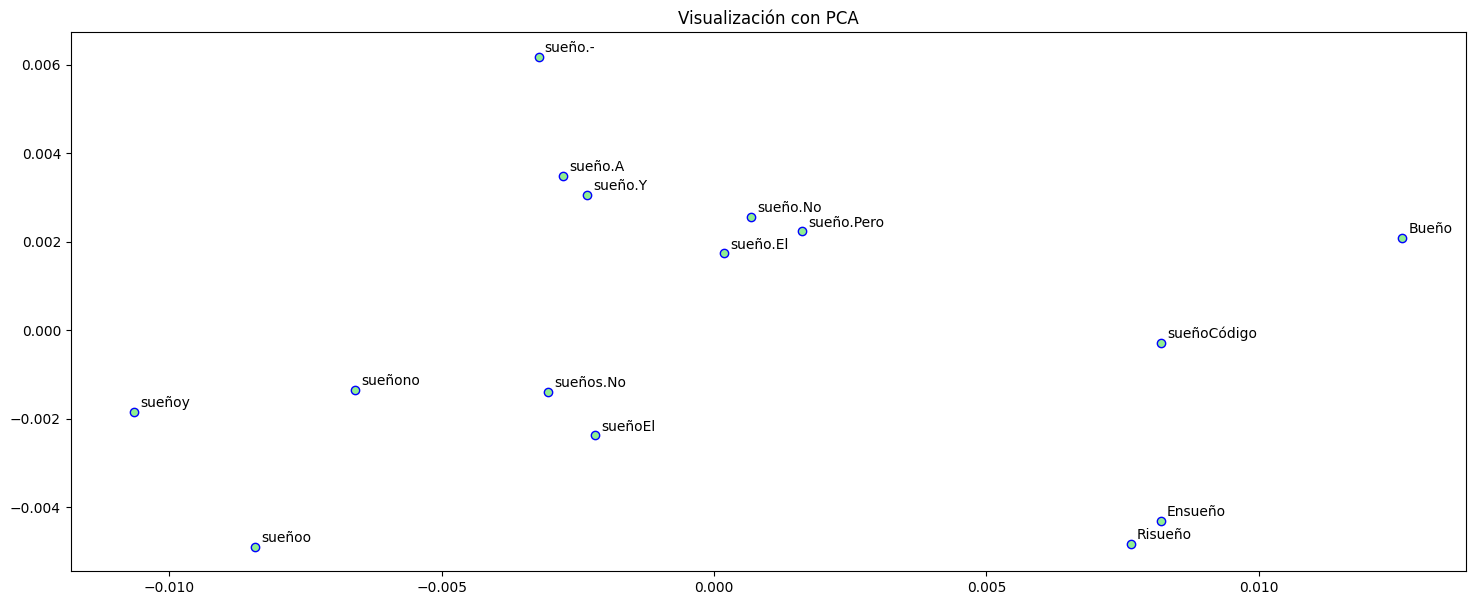

In [31]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

p = model_vec.get_nearest_neighbors('sueño',k=15)
similar_words = [x[1] for x in p]
wvs = np.array([model.get_word_vector(sw) for sw in similar_words])

pca = PCA(n_components=2)
P = pca.fit_transform(wvs)
labels = similar_words

plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='b')
plt.title('Visualización con PCA')

eps = 0.5e12*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')

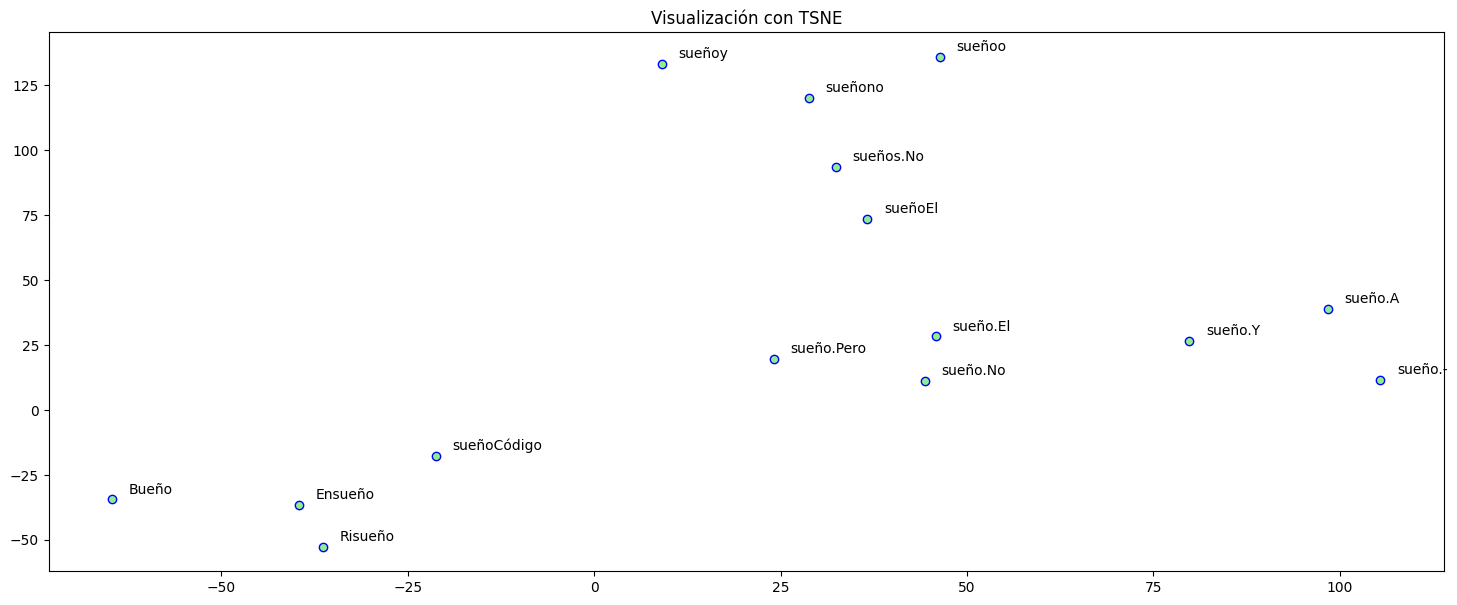

In [32]:
%matplotlib tk
%matplotlib inline
# visualize embeddings
from sklearn.manifold import TSNE

p = model_vec.get_nearest_neighbors('sueño',k=15)
similar_words = [x[1] for x in p]
wvs = np.array([model.get_word_vector(sw) for sw in similar_words])

tsne = TSNE(n_components=2, random_state=200, n_iter=5000, perplexity=2,learning_rate='auto',init='pca')
P = tsne.fit_transform(wvs)
labels = similar_words

plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='b')
plt.title('Visualización con TSNE')

eps = 1e16*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')

### Visualización de Embeddings de Textos

 get_sentence_vector: 
 Given a string, get a single vector representation. This function assumes to be given a single line of text. We split words on
 whitespace (space, newline, tab, vertical tab) and the control characters carriage return, formfeed and the null character.

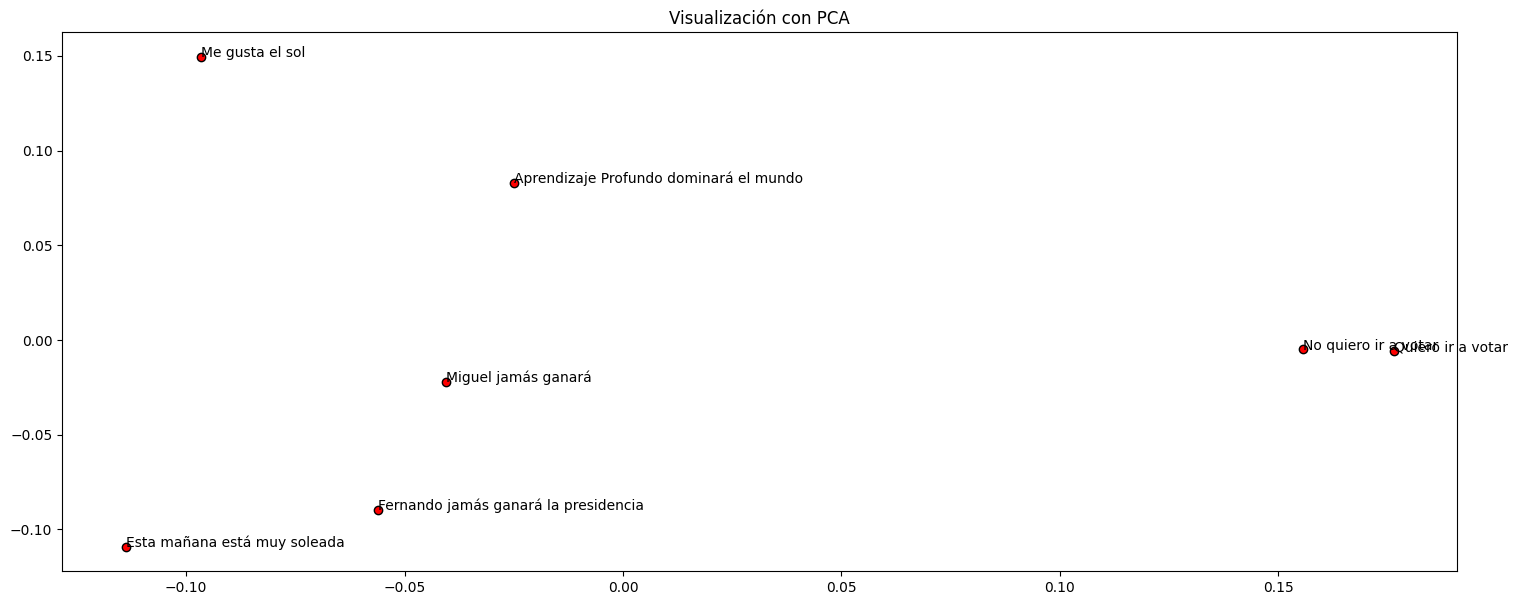

In [33]:
textos = ['Esta mañana está muy soleada',
         'Miguel jamás ganará',
         'Fernando jamás ganará la presidencia',
         'No quiero ir a votar',
         'Quiero ir a votar',
         'Me gusta el sol',
         'Aprendizaje Profundo dominará el mundo']

wvs = np.array([model_vec.get_sentence_vector(t) for t in textos])

pca = PCA(n_components=2)
P = pca.fit_transform(wvs)
labels = textos

plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='red', edgecolors='k')
plt.title('Visualización con PCA')

eps = 1e11*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')
    

PCA vs T-SNE

La principal diferencia es que PCA es un algoritmo lineal, por lo que únicamente encontrará dependencias o relaciones lineales en los datos. De esta forma obviará todo tipo de relación polinomial compleja, mientras que T-SNE si que será capaz de resaltarlas

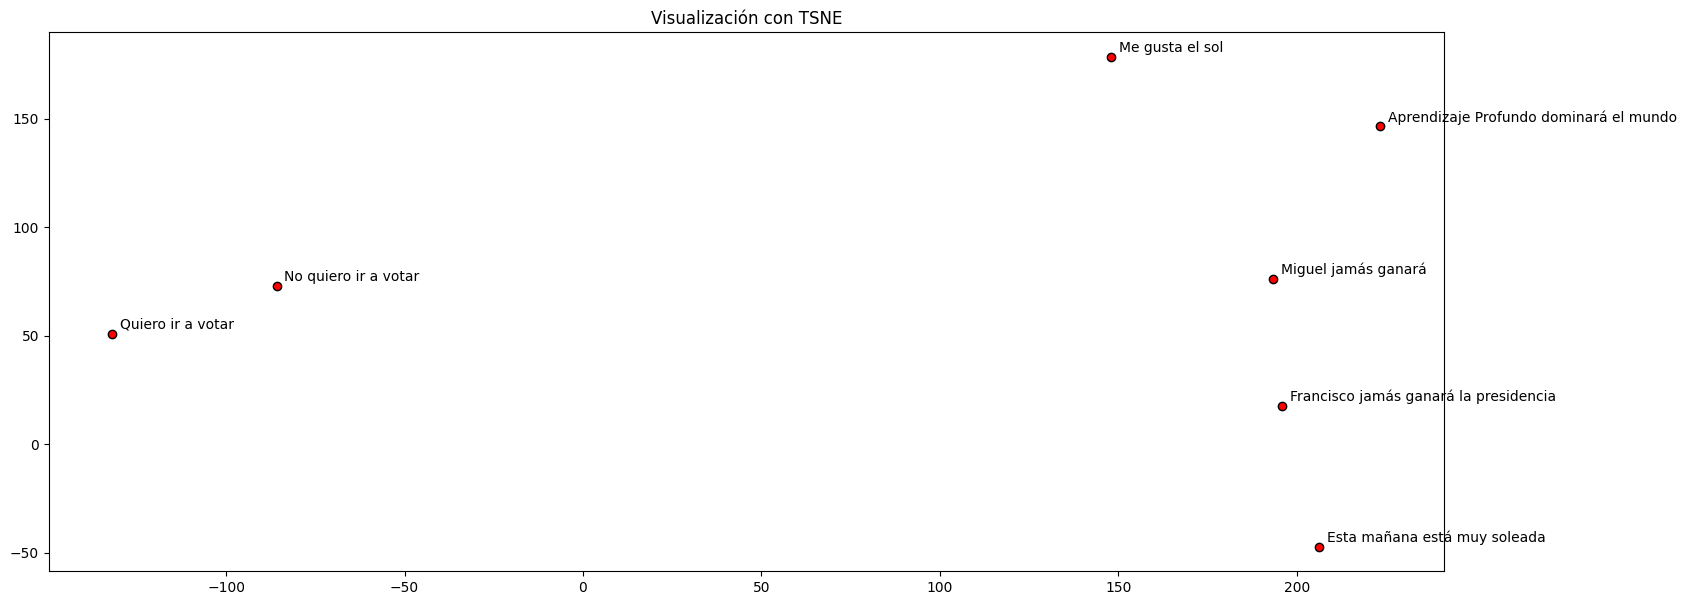

In [34]:
from sklearn.manifold import TSNE

textos = ['Esta mañana está muy soleada',
         'Miguel jamás ganará',
         'Francisco jamás ganará la presidencia',
         'No quiero ir a votar',
         'Quiero ir a votar',
         'Me gusta el sol',
         'Aprendizaje Profundo dominará el mundo']

wvs = np.array([model_vec.get_sentence_vector(t) for t in textos])

tsne = TSNE(n_components=2, random_state=200, n_iter=5000, perplexity=2,learning_rate='auto',init='pca')
P = tsne.fit_transform(wvs)
labels = textos

plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='r', edgecolors='k')
plt.title('Visualización con TSNE')

eps = 1e16*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')

[[Volver al inicio]](#Contenido)

### Usando Modelos Pre-entrados en Español

In [35]:
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
#ft = fasttext.load_model('cc.en.300.bin')

'cc.en.300.bin'

In [36]:
import fasttext.util
fasttext.util.download_model('es', if_exists='ignore')  # Spanish

'cc.es.300.bin'

In [37]:
model_es = ft.load_model('cc.es.300.bin')

In [38]:
# TAKES TIME! DONT RUN IT IN CLASS
model_es.get_nearest_neighbors('sueño',k=15)

[(0.7171677947044373, 'sueños'),
 (0.7092401385307312, 'sueno'),
 (0.6959096789360046, 'sueño.El'),
 (0.6859577298164368, 'sueño.Y'),
 (0.6825155019760132, 'Sueño'),
 (0.6815561652183533, 'sueño.La'),
 (0.6758346557617188, 'sueño.Pero'),
 (0.6724787950515747, 'sueño.A'),
 (0.6669973134994507, 'sueño.Es'),
 (0.6650846600532532, 'sueñoUn'),
 (0.6573185920715332, 'elsueño'),
 (0.6529608964920044, 'sueño.Un'),
 (0.6516568064689636, 'sueñ'),
 (0.6469879746437073, 'sueño.En'),
 (0.6467815637588501, 'sueñoEn')]

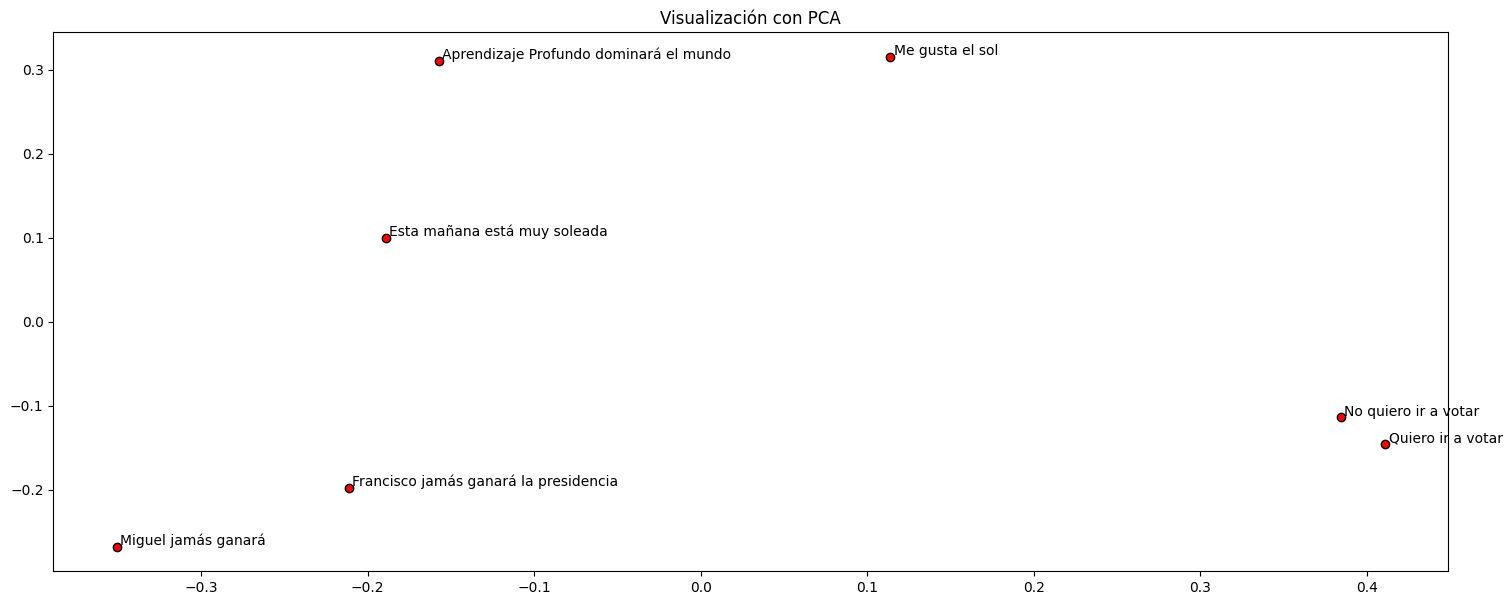

In [39]:
textos = ['Esta mañana está muy soleada',
         'Miguel jamás ganará',
         'Francisco jamás ganará la presidencia',
         'No quiero ir a votar',
         'Quiero ir a votar',
         'Me gusta el sol',
         'Aprendizaje Profundo dominará el mundo']

wvs = np.array([model_es.get_sentence_vector(t) for t in textos])

pca = PCA(n_components=2)
P = pca.fit_transform(wvs)
labels = textos

plt.figure(figsize=(18, 7))
plt.scatter(P[:, 0], P[:, 1], c='red', edgecolors='k')
plt.title('Visualización con PCA')

eps = 1e13*np.finfo(float).eps
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+eps, y+eps), xytext=(0, 0), textcoords='offset points')

### Re-entrenando Embedding 

### <span style="color:red">¡NO CORRER DE MANERA LOCAL A MENOS QUE TENGA SUFICIENTE MEMORIA RAM!</span>

In [40]:
#model_transfer_learning_es = ft.train_unsupervised('../Datos/Poemas_Todo.txt', minCount=2, minn=3, maxn=6, dim=300,pretrainedVectors='cc.es.300.vec')

In [41]:
model_vec.get_nearest_neighbors('amor')

[(0.9971210360527039, 'amorAmor'),
 (0.9965686202049255, 'amorPor'),
 (0.9958484172821045, 'amor.Por'),
 (0.9946593642234802, 'amooor'),
 (0.9946556091308594, 'amoooor'),
 (0.9946513175964355, 'amoor'),
 (0.9946479201316833, 'amooooor'),
 (0.9946250319480896, 'amorr'),
 (0.9933939576148987, 'amHumor'),
 (0.990982174873352, 'Yamor')]

## Uso del Modelo (Wikipedia) 

Install en Terminal de Anaconda: conda install posix 

(para simular linux)

Primero que todo, obtengamos los datos que necesitamos:

In [42]:
#!pip install wget


Descargar enwik9.zip

In [43]:
#import wget

#url = "http://mattmahoney.net/dc/enwik9.zip"
#wget.download(url, '../Datos')

In [44]:
# Corpus Completo
#!wget https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2 -o ../Datos/enwiki-latest-pages-articles.xml.bz2
# Corpus 1 billón de bytes (1 Giga)
#!wget -c http://mattmahoney.net/dc/enwik9.zip -P ../Datos

In [45]:
#!pip install unzip

In [46]:
#import glob
#import zipfile

#files = glob.glob('../Datos/*.zip')
#files


[]

In [47]:
#for file in files:
#    print('Unzipping:',file)

#    with zipfile.ZipFile(file, 'r') as zip_ref:
#        zip_ref.extractall('../Datos')


Como el formato viene en `.zip`, descomprimamos el contenido

In [48]:
#!unzip ../Datos/enwik9.zip -d ../Datos

Miremos algo de información:

In [49]:
#!head -c 2000 ../Datos/enwik9

<mediawiki xmlns="http://www.mediawiki.org/xml/export-0.3/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.mediawiki.org/xml/export-0.3/ http://www.mediawiki.org/xml/export-0.3.xsd" version="0.3" xml:lang="en">
  <siteinfo>
    <sitename>Wikipedia</sitename>
    <base>http://en.wikipedia.org/wiki/Main_Page</base>
    <generator>MediaWiki 1.6alpha</generator>
    <case>first-letter</case>
      <namespaces>
      <namespace key="-2">Media</namespace>
      <namespace key="-1">Special</namespace>
      <namespace key="0" />
      <namespace key="1">Talk</namespace>
      <namespace key="2">User</namespace>
      <namespace key="3">User talk</namespace>
      <namespace key="4">Wikipedia</namespace>
      <namespace key="5">Wikipedia talk</namespace>
      <namespace key="6">Image</namespace>
      <namespace key="7">Image talk</namespace>
      <namespace key="8">MediaWiki</namespace>
      <namespace key="9">MediaWiki talk</namespace>
      <namespa

Como un archivo raw de Wikipedia contiene toneladas de datos HTML/XML, preprocesaremos la información con el archivo wikifil.pl, escrito por Matt Mahoney y puede ser encontrado el script original en su paǵina personal [aquí](http://mattmahoney.net/).

El script asociado funciona usando el lenguaje de programación PERL, y se ejecuta a continuación:

### Preprocesamiento

In [50]:
#import regex as re

In [51]:
#text="Les tomaron la cara 101     y respiraron. | en su frente,"

In [52]:
#re.sub(r'[^a-z]',text,' ')

In [53]:
#!pip install perl

In [54]:
#!perl ../Datos/wikifil.pl ../Datos/enwik9 > ../Datos/fil9

In [55]:
#import perl

#perl.eval("system('perl wikifil.pl enwik9 > fil9')")

In [56]:
!head -c 2000 ../Datos/clean.txt

From my grandfather Verus I learned good morals and the government of my temper.
From the reputation and remembrance of my father, modesty and a manly character.
From my mother, piety and beneficence, and abstinence, not only from evil deeds, but even from evil thoughts; and further, simplicity in my way of living, far removed from the habits of the rich.
From my great-grandfather, not to have frequented public schools, and to have had good teachers at home, and to know that on such things a man should spend liberally.
From my governor, to be neither of the green nor of the blue party at the games in the Circus, nor a partizan either of the Parmularius or the Scutarius at the gladiators' fights; from him too I learned endurance of labour, and to want little, and to work with my own hands, and not to meddle with other people's affairs, and not to be ready to listen to slander.
From Diognetus, not to busy myself about trifling things, and not to give credit to what was said by miracle-wo

Veamos algo del resultado obtenido:

In [57]:
#!head -c 2000 ../Datos/fil9

[[Volver al inicio]](#Contenido)

### Entrenando del Modelo

In [58]:
import fasttext as ft

model = ft.train_unsupervised('../Datos/clean.txt')

[[Volver al inicio]](#Contenido)

### Palabras más cercanas

In [59]:
model.get_nearest_neighbors('grandfather')

[(0.9999352097511292, 'further'),
 (0.9999281764030457, 'rather'),
 (0.9999221563339233, 'Either'),
 (0.9999096989631653, 'whether'),
 (0.999897837638855, 'together'),
 (0.9998972415924072, 'others.'),
 (0.9998875260353088, 'altogether'),
 (0.9998862147331238, 'others,'),
 (0.9998784065246582, 'Another'),
 (0.999875545501709, 'Alexander')]

[[Volver al inicio]](#Contenido)

###  Curiosidades

In [60]:
model.get_nearest_neighbors('pidgey')

[(0.9982141852378845, 'before,'),
 (0.9981576800346375, 'before'),
 (0.9981536865234375, 'They'),
 (0.9981411099433899, 'around'),
 (0.9981375336647034, 'care'),
 (0.9981345534324646, 'towards'),
 (0.9981326460838318, 'daily'),
 (0.9981279373168945, 'value'),
 (0.998126745223999, 'times'),
 (0.9981207847595215, 'To')]

[[Volver al inicio]](#Contenido)

###  Analogía de Palabras

In [61]:
model.get_analogies("berlin", "germany", "france")

[(0.99932861328125, 'intelligence'),
 (0.9993226528167725, 'mind.'),
 (0.9993211030960083, 'hindrance'),
 (0.9993104934692383, 'intelligence.'),
 (0.9993088245391846, 'intelligent'),
 (0.999305248260498, 'mind,'),
 (0.9993047714233398, 'its'),
 (0.9993026256561279, 'every'),
 (0.9992952346801758, 'Every'),
 (0.9992846250534058, 'intellectual')]

[[Volver al inicio]](#Contenido)

## Modelo Supervisado

Para este ejemplo, usaremos el conjunto de datos de preguntas de [the cooking section of Stackexchange](https://cooking.stackexchange.com/):
Descagar el archivo cooking.stackexchange.tar.gz e instalarlo en la carpeta /Datos

In [62]:
#!wget https://dl.fbaipublicfiles.com/fasttext/data/cooking.stackexchange.tar.gz && tar xvzf cooking.stackexchange.tar.gz

In [63]:
#import wget

#url = "https://dl.fbaipublicfiles.com/fasttext/data/cooking.stackexchange.tar.gz"
#wget.download(url, '../Datos')

In [64]:
#import tarfile

In [65]:
#tf = tarfile.open('../Datos/cooking.stackexchange.tar.gz')

In [66]:
#tf.extractall(r'../Datos')

In [67]:
!head cooking.stackexchange.txt

__label__sauce __label__cheese How much does potato starch affect a cheese sauce recipe?
__label__food-safety __label__acidity Dangerous pathogens capable of growing in acidic environments
__label__cast-iron __label__stove How do I cover up the white spots on my cast iron stove?
__label__restaurant Michelin Three Star Restaurant; but if the chef is not there
__label__knife-skills __label__dicing Without knife skills, how can I quickly and accurately dice vegetables?
__label__storage-method __label__equipment __label__bread What's the purpose of a bread box?
__label__baking __label__food-safety __label__substitutions __label__peanuts how to seperate peanut oil from roasted peanuts at home?
__label__chocolate American equivalent for British chocolate terms
__label__baking __label__oven __label__convection Fan bake vs bake
__label__sauce __label__storage-lifetime __label__acidity __label__mayonnaise Regulation and balancing of readymade packed mayonnaise and other sauces


wc: The output of this command will typically show three numbers:

    The number of lines in the file.
    The number of words in the file.
    The number of characters (including spaces, tabs, and newlines) in the file.

In [68]:
!wc cooking.stackexchange.txt

  15404  169582 1401900 cooking.stackexchange.txt


In [69]:
!head -n 12404 cooking.stackexchange.txt > cooking.train

In [70]:
!tail -n 3000 cooking.stackexchange.txt > cooking.valid

[[Volver al inicio]](#Contenido)

### Uso del Modelo

In [71]:
import fasttext as ft

In [72]:
model = ft.train_supervised(input="cooking.train")

array([0.06150715]): This is the probability score associated with the predicted label.

In [73]:
model.predict("Which baking dish is best to bake a banana bread ?")

(('__label__baking',), array([0.06150715]))

In [74]:
model.predict("Which baking dish is best to bake a banana bread ?",k=2)

(('__label__baking', '__label__food-safety'), array([0.06150715, 0.0414247 ]))

In [75]:
model.test("cooking.valid")

(3000, 0.13966666666666666, 0.060400749603575034)

k=numero de etiquetas que va a predecir, por defecto es 1.

In [76]:
model.test("cooking.valid", k=5)

(3000, 0.0662, 0.143145451924463)

[[Volver al inicio]](#Contenido)

### Mejorando el Modelo 

In [77]:
!cat cooking.stackexchange.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > cooking.preprocessed.txt
!head -n 12404 cooking.preprocessed.txt > cooking.train
!tail -n 3000 cooking.preprocessed.txt > cooking.valid

In [78]:
model = ft.train_supervised(input="cooking.train")

In [79]:
model.test("cooking.valid")

(3000, 0.154, 0.06659939455095863)

[[Volver al inicio]](#Contenido)

###  Autotuning de Parámetros

In [ ]:
model = ft.train_supervised(input='cooking.train', autotuneValidationFile='cooking.valid')

In [ ]:
model.test("cooking.valid")

[[Volver al inicio]](#Contenido)

## <span style="color:blue">Referencias</span> 

1. P. Bojanowski*, E. Grave*, A. Joulin, T. Mikolov, [Enriching Word Vectors with Subword Information](https://arxiv.org/pdf/1607.04606.pdf)
2. A. Joulin, E. Grave, P. Bojanowski, T. Mikolov, [Bag of Tricks for Efficient Text Classification](https://arxiv.org/pdf/1607.01759.pdf)
3. A. Joulin, E. Grave, P. Bojanowski, M. Douze, H. Jégou, T. Mikolov, [FastText.zip: Compressing text classification models](https://arxiv.org/pdf/1612.03651.pdf)